In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': True,
    'val_split': 0.75
}

In [3]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# The code block contains three functions:

# 1. `load_image(path)`: This function loads an image from the
# given path, converts it to grayscale or RGB based on the value
# of `opt['is_grayscale']`, resizes it to the specified
# `opt['image_size']`, normalizes the pixel values to be
# between 0 and 1, and returns the resulting image as a numpy
# array.

# 2. `display_images(imgs, classes, row=1, col=2, w=32, h=32)`:
# This function takes a list of images `imgs` and their
# corresponding classes `classes`, and displays them in a grid
# with `row` rows and `col` columns. Each image is displayed with
# its corresponding class label as the title.

# 3. `load_data(dir_path)`: This function loads all the images
# in the directory specified by `dir_path`, converts them to
# grayscale or RGB based on the value of `opt['is_grayscale']`,
# resizes them to the specified `opt['image_size']`, normalizes
# the pixel values to be between 0 and 1, and returns the resulting
# images and their corresponding class labels as numpy arrays.

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [4]:
dirpath = 'IIIT-CFW/'
X,y = load_data(dirpath)

# The dataset shape `(672, 32, 32, 3)` indicates that there are 672 
# images in the dataset, each of size 32x32 pixels, and with 3
# color channels (RGB).

# The label shape `(672,)` indicates that there is one label for
# each image in the dataset. The labels are stored as a 1D array
#  of length 672.

Dataset shape: (672, 32, 32)
Label shape: (672,)


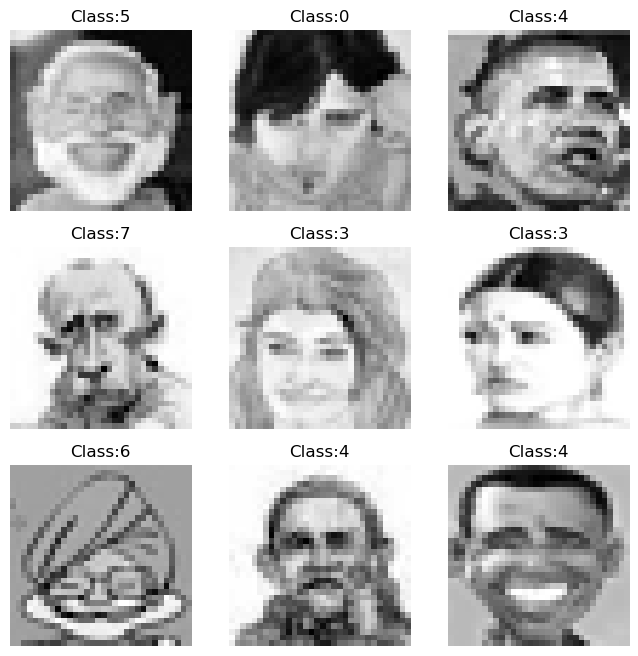

In [5]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],9)
display_images(X[ind,...],y[ind], row=3,col=3)

In [8]:
def PCA(X):
    X = X.reshape(X.shape[0], -1)
    X = X - np.mean(X, axis=0)
    U, S, V = np.linalg.svd(X)
    return U, S, V, np.mean(X, axis=0)

In [9]:
U, S, V, X_mean = PCA(X)

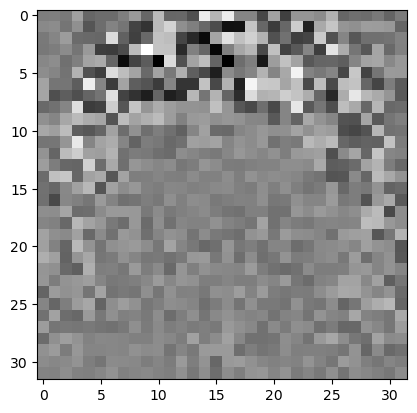

In [10]:
plt.imshow(X_mean.reshape(H,W,C), cmap='gray')

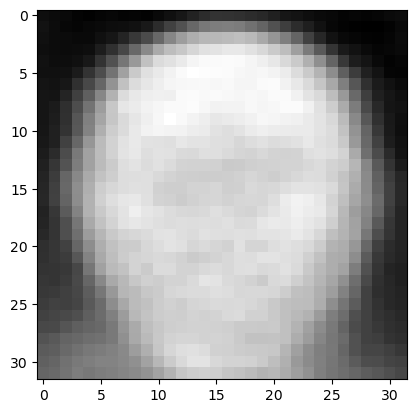

In [14]:
plt.imshow(V[1].reshape(H,W,C), cmap='gray')